In [1]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 33.4 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow
import os
import cv2
from google.colab.patches import cv2_imshow

from ultralytics import YOLO
from zipfile import ZipFile
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="30wuGPWeuvUj5U3xDZeU")
project = rf.workspace("sandy-hedia-llkas").project("fall-detection-8rcqe")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fall-detection--1 in yolov11:: 100%|██████████| 2190/2190 [00:01<00:00, 1825.08it/s]


In [4]:
!mkdir ~/.kaggle

In [5]:
! cp /content/kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#!/bin/bash
!kaggle datasets download uttejkumarkandagatla/fall-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/uttejkumarkandagatla/fall-detection-dataset
License(s): ODbL-1.0
 91% 45.0M/49.7M [00:01<00:00, 30.2MB/s]
100% 49.7M/49.7M [00:02<00:00, 25.0MB/s]


In [8]:
# Put on the same directory

# specifying the name of the zip file
file = "/content/fall-detection-dataset.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as zip:
    # list all the contents of the zip file
    zip.printdir()

    # extract all files
    print('extraction...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
fall_dataset/images/train/fall001.jpg          2021-12-06 13:03:16        13649
fall_dataset/images/train/fall002.jpg          2021-12-06 13:03:16        22455
fall_dataset/images/train/fall003.jpg          2021-12-06 13:03:16        17786
fall_dataset/images/train/fall004.jpg          2021-12-06 13:03:16        23101
fall_dataset/images/train/fall005.jpg          2021-12-06 13:03:16        21293
fall_dataset/images/train/fall006.jpg          2021-12-06 13:03:16        31920
fall_dataset/images/train/fall007.jpg          2021-12-06 13:03:16        26211
fall_dataset/images/train/fall008.jpg          2021-12-06 13:03:16        17344
fall_dataset/images/train/fall009.jpg          2021-12-06 13:03:16        21293
fall_dataset/images/train/fall010.jpg          2021-12-06 13:03:16        30478
fall_dataset/images/train/fall011.jpg          2021-12-06 13:03:16        23509
fall_dataset/images/train/fall012.jpg   

In [9]:
train = os.listdir('/content/fall-detection--1/train/images')
val_vichels = os.listdir('/content/fall_dataset/images/val')
print( 'train:',len(train) ,'val:' , len(val_vichels) )

train: 1092 val: 111


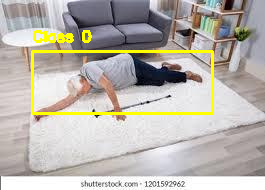

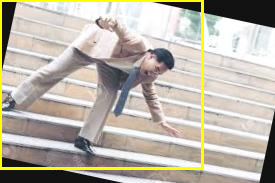

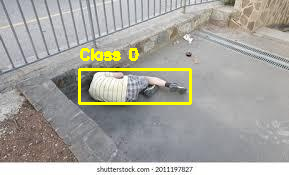

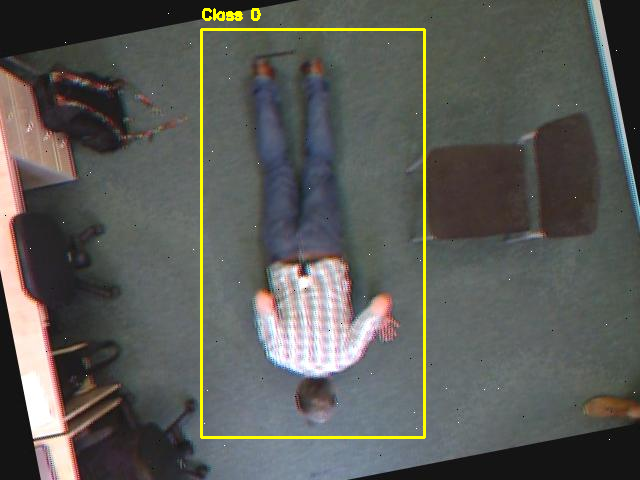

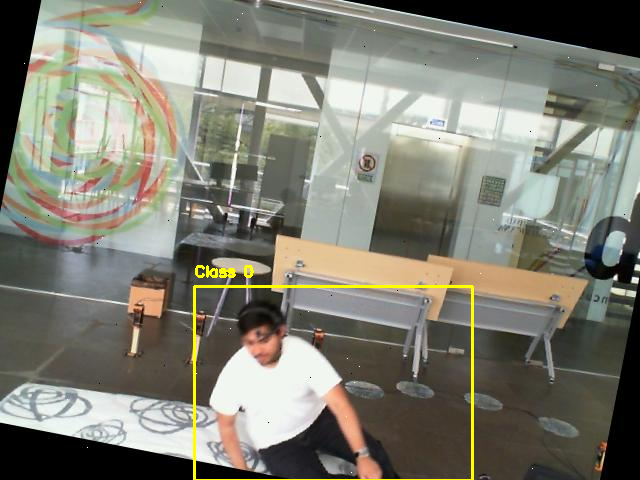

In [10]:

# Path to the training data
train_vichels_folder = '/content/fall-detection--1/train/images'
train_labels_folder = '/content/fall-detection--1/train/labels'

# List all files in the training vichels folder
train_vichels_files = os.listdir(train_vichels_folder)

# Select a sample file (for example, the first one)
sample_files = train_vichels_files[:5]

for sample_file in sample_files:
    # Load the image
    image_path = os.path.join(train_vichels_folder, sample_file)
    image = cv2.imread(image_path)

    # Get image dimensions
    height, width, _ = image.shape

    # Load the corresponding label
    label_file = sample_file.replace('.jpg', '.txt').replace('.JPG', '.txt')
    label_path = os.path.join(train_labels_folder, label_file)

    # Read the label content and draw bounding boxes
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Assuming label format: class_id x_center y_center width height (normalized values)
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, box_width, box_height = map(float, parts[1:])

            # Convert normalized coordinates to absolute coordinates
            x_center_abs = int(x_center * width)
            y_center_abs = int(y_center * height)
            box_width_abs = int(box_width * width)
            box_height_abs = int(box_height * height)

            # Calculate the top-left and bottom-right coordinates of the bounding box
            x1 = int(x_center_abs - box_width_abs / 2)
            y1 = int(y_center_abs - box_height_abs / 2)
            x2 = int(x_center_abs + box_width_abs / 2)
            y2 = int(y_center_abs + box_height_abs / 2)

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 2)

            # Add the label text near the bounding box
            label_text = f'Class {class_id}'
            cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

    # Display the image with the bounding box and label using cv2_imshow
    cv2_imshow(image)


In [11]:
# Load YOLOv10n model from scratch
model = YOLO("yolov10n.yaml")

In [ ]:
# Train the model
model.train(data="/content/fall_detection.yaml", epochs=200, imgsz=640)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=/content/fall_detection.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 119MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 269MB/s]


AMP: checks passed ✅


train: Scanning /content/fall-detection--1/train/labels... 1092 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1092/1092 [00:00<00:00, 2003.49it/s]

train: New cache created: /content/fall-detection--1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/fall_dataset/labels/val... 111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 111/111 [00:00<00:00, 820.24it/s]

val: New cache created: /content/fall_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.03G      6.026      12.31      8.449         21        640: 100%|██████████| 69/69 [00:28<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        111        114   0.000594      0.273   0.000929   0.000308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.04G      5.852      10.94      7.846         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        111        114    0.00147      0.459     0.0144    0.00357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.04G      5.273      9.303      6.771          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]


                   all        111        114    0.00277      0.724     0.0138    0.00326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.04G      4.861      8.391      6.156          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        111        114    0.00214      0.583     0.0068    0.00216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.06G       4.57      7.677      5.616         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]


                   all        111        114      0.678      0.241     0.0502     0.0145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.04G      4.262      7.065      5.197          8        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        111        114      0.693      0.088     0.0285    0.00933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.04G      4.104      6.755      5.036         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all        111        114      0.688      0.139     0.0451     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.05G      4.001      6.188      4.799          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        111        114      0.418      0.102     0.0877     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.06G      3.847      5.873      4.652         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        111        114      0.395      0.157      0.113     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.06G      3.804       5.61      4.503         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        111        114       0.26      0.212      0.154      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.05G       3.68      5.418      4.408         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all        111        114      0.144      0.176      0.156     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.06G      3.623      5.205      4.346         18        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        111        114      0.227      0.228      0.167     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.06G      3.584      5.032      4.269         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        111        114      0.166      0.273      0.167     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.04G      3.495       4.93      4.123         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        111        114      0.381      0.298       0.21     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.04G      3.459      4.806      4.099          7        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        111        114      0.343      0.288      0.269      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.04G      3.424      4.658      4.019          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        111        114      0.411      0.336      0.341      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.03G      3.417       4.62      4.019          7        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        111        114      0.349      0.329      0.304      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.07G      3.374      4.453      3.965         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        111        114      0.287      0.273      0.242      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.04G      3.327      4.418      3.921          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        111        114       0.56      0.325      0.309      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.06G      3.285       4.32       3.87          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all        111        114      0.278       0.36      0.262      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      3.05G       3.26       4.23      3.817          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        111        114      0.259      0.304      0.246      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.05G      3.241      4.172       3.82          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all        111        114      0.381       0.38      0.293      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.04G      3.138      4.034      3.744          7        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        111        114      0.306      0.399       0.27      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.07G      3.137       3.93      3.711          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        111        114      0.249      0.352      0.244      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.06G      3.162       4.06      3.785          8        640: 100%|██████████| 69/69 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        111        114      0.404      0.436      0.392      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.07G      3.156      3.962      3.722         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        111        114      0.407      0.359      0.327      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.05G      3.082      3.895      3.687         15        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        111        114      0.339      0.388      0.354      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.04G      3.078      3.836      3.662         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        111        114      0.485      0.323      0.337      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.06G      3.033      3.764      3.621         15        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        111        114      0.536       0.38      0.384      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.04G      3.063      3.726      3.599          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        111        114      0.487      0.327      0.313      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.04G      3.005      3.587      3.553          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        111        114        0.7      0.483      0.536      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.04G      3.028      3.677      3.575          7        640: 100%|██████████| 69/69 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        111        114       0.37      0.429      0.344      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.03G      2.961      3.596      3.535          7        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        111        114      0.351      0.562      0.414      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.05G      2.984      3.573      3.525         17        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        111        114      0.434      0.412      0.371      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      3.04G      2.929      3.452      3.494         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


                   all        111        114      0.427       0.52      0.456      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.05G      2.908      3.435      3.477         14        640: 100%|██████████| 69/69 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        111        114       0.43      0.457      0.417      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.03G      2.904       3.46      3.469          8        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        111        114      0.407      0.516      0.441       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.04G      2.884      3.402      3.426          6        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        111        114      0.357      0.449      0.385      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.04G      2.901      3.263      3.446         14        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        111        114      0.495      0.461      0.416      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.09G      2.859      3.347      3.417         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        111        114      0.555      0.483      0.472      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.03G      2.915      3.321      3.431         12        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        111        114      0.427      0.552      0.487      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.04G      2.829      3.208      3.375          7        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        111        114      0.579      0.328      0.407      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.04G      2.847      3.298      3.406         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        111        114      0.354      0.534      0.486      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.06G       2.82      3.148      3.353         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        111        114      0.635      0.506      0.558      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.05G      2.819      3.187      3.342          7        640: 100%|██████████| 69/69 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        111        114      0.591      0.607      0.562      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.04G      2.778      3.128      3.336         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        111        114      0.662      0.364      0.484      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      3.05G      2.781      3.124      3.331         13        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        111        114      0.504      0.522      0.512      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      3.09G      2.752       3.13      3.317         16        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        111        114      0.494       0.64      0.555       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.03G      2.773      3.032      3.318         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        111        114      0.489      0.468      0.454       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       3.1G       2.69       2.99      3.252         15        640: 100%|██████████| 69/69 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        111        114      0.723      0.469      0.605      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      3.09G      2.691      2.941      3.258          6        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        111        114      0.585      0.499      0.566      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.04G      2.652      2.894      3.238         16        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        111        114      0.666      0.519       0.61      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      3.06G      2.613      2.891      3.201         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        111        114       0.46      0.472      0.444      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.04G      2.642      2.965      3.233          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all        111        114      0.663      0.484      0.494      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      3.06G       2.72      2.974      3.243         15        640: 100%|██████████| 69/69 [00:25<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        111        114      0.679      0.564      0.618      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      3.04G      2.667      2.877      3.227          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        111        114      0.594      0.625      0.595       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      3.03G      2.594      2.838      3.185         16        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        111        114      0.473      0.501      0.395      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      3.08G      2.611      2.761      3.172          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        111        114      0.599       0.48      0.505      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      3.04G      2.607      2.746      3.169         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


                   all        111        114      0.839      0.364      0.569      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      3.04G      2.584      2.779      3.167          8        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        111        114      0.571      0.572      0.621      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      3.03G      2.575      2.734      3.137          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


                   all        111        114      0.515      0.508      0.513      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      3.08G      2.534      2.592      3.088         16        640: 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        111        114      0.616      0.588      0.626      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      3.04G      2.571      2.701      3.133         13        640: 100%|██████████| 69/69 [00:22<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        111        114      0.781      0.365      0.498      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.06G      2.547      2.632      3.105          7        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all        111        114      0.551      0.469      0.493      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      3.03G       2.54      2.636      3.106         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        111        114      0.563      0.561      0.497      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.04G      2.549      2.632      3.116          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        111        114      0.733        0.6      0.668      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      3.04G      2.596      2.606      3.128          8        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        111        114      0.577      0.463      0.452      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      3.06G      2.508      2.558      3.067          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all        111        114      0.601      0.537      0.552      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      3.03G      2.505      2.526      3.054         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        111        114      0.671      0.506       0.59      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      3.04G       2.53      2.535      3.077         12        640: 100%|██████████| 69/69 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        111        114      0.719       0.51      0.615      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.06G      2.478      2.546      3.043         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        111        114      0.667      0.482      0.561      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      3.04G      2.478       2.52      3.056          8        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all        111        114      0.734      0.506       0.59       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      3.03G       2.51      2.493      3.085         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        111        114      0.634      0.637      0.633      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.05G      2.481      2.483      3.048         11        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        111        114      0.586       0.52      0.516      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      3.04G      2.438      2.441      3.005         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        111        114      0.634      0.513      0.576      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      3.06G      2.443      2.441      3.017         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]

                   all        111        114      0.596      0.557       0.58      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      3.06G       2.43      2.408          3         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


                   all        111        114      0.749      0.601      0.658      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      3.04G      2.372      2.327      2.953         11        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        111        114      0.712      0.527      0.623      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      3.04G      2.346      2.363      2.939         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        111        114      0.686      0.567      0.637      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      3.04G      2.384      2.399      2.964         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        111        114      0.722      0.522      0.625      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      3.04G      2.306      2.297       2.93         19        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        111        114       0.75      0.486      0.551      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      3.06G      2.368      2.323      2.939         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        111        114      0.699      0.533      0.587      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      3.04G      2.368      2.337      2.951         12        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        111        114      0.495      0.639      0.623       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.04G      2.315      2.299       2.91         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        111        114      0.717      0.585      0.662      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.03G      2.301      2.285      2.936         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all        111        114      0.658       0.55      0.604      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      3.06G      2.359      2.279      2.945         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        111        114      0.776      0.493      0.616      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      3.05G       2.29      2.187      2.866         13        640: 100%|██████████| 69/69 [00:22<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        111        114      0.772      0.544      0.644      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      3.04G       2.28      2.263      2.914         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all        111        114      0.658      0.694      0.678      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.03G      2.298       2.24      2.903         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        111        114      0.774      0.531       0.62      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      3.06G      2.334      2.238       2.89          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        111        114      0.676      0.598      0.657      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      3.04G      2.247       2.19      2.873         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        111        114      0.675      0.588       0.61      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.09G      2.288      2.174      2.854         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        111        114      0.826      0.464      0.606      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.03G       2.28      2.235      2.863         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        111        114       0.71      0.559      0.626      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      3.04G      2.215      2.132      2.843         15        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        111        114      0.757      0.512      0.606      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      3.04G      2.206      2.157      2.842          6        640: 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]

                   all        111        114      0.681      0.543      0.597      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.06G      2.258      2.236      2.869          8        640: 100%|██████████| 69/69 [00:22<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        111        114      0.735      0.653      0.713      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      3.03G      2.247      2.084      2.854         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        111        114      0.634      0.592      0.612      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      3.04G      2.225      2.109      2.851          5        640: 100%|██████████| 69/69 [00:22<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        111        114      0.716       0.52       0.55      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      3.06G      2.231      2.098      2.836          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all        111        114       0.68      0.708      0.735      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200       3.1G       2.22      2.085      2.821         15        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        111        114      0.733      0.554      0.635      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      3.03G      2.249      2.144      2.852         13        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        111        114      0.824      0.426      0.619      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      3.04G      2.208      2.119      2.813         13        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        111        114      0.616       0.62      0.628      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      3.04G      2.231      2.075      2.823          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        111        114      0.693      0.678      0.666      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      3.07G      2.177      2.008      2.794         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        111        114      0.664      0.556      0.616      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.03G      2.163      2.048      2.794          6        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        111        114      0.855       0.46      0.562      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.04G      2.183      2.103      2.845          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        111        114      0.664      0.491      0.591      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      3.07G      2.145      2.049      2.783         11        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        111        114      0.758      0.521      0.625      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      3.05G      2.187       2.05      2.822         17        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        111        114      0.743      0.528       0.64      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      3.04G      2.154      2.052      2.762         16        640: 100%|██████████| 69/69 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all        111        114      0.665      0.485      0.608      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      3.06G      2.118      2.026      2.776         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        111        114      0.755      0.528      0.539      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      3.06G      2.105      1.986      2.747         14        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        111        114      0.776      0.592      0.686       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      3.06G      2.103      1.921      2.762          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all        111        114        0.8      0.634      0.774      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      3.03G      2.071      1.909      2.727          8        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        111        114      0.789      0.578      0.673      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      3.05G      2.089      1.897      2.743         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        111        114       0.62      0.571      0.628      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      3.05G      2.085      1.942      2.743         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        111        114      0.567      0.607      0.624      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      3.04G        2.1      1.915      2.732          8        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all        111        114       0.59      0.516       0.53      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      3.05G      2.031      1.864      2.682         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        111        114      0.704      0.621      0.684      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      3.04G      2.007      1.935      2.687         17        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        111        114      0.804      0.472      0.597      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      3.09G      2.054      1.965      2.703         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        111        114      0.638      0.593      0.598      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.06G      2.045      1.938      2.704         11        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        111        114       0.77       0.54      0.617      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      3.07G       2.01      1.859      2.681         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        111        114      0.777      0.569      0.676      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.04G      1.997      1.802      2.654          9        640: 100%|██████████| 69/69 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        111        114      0.735      0.515      0.622      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.04G      1.981      1.823      2.663          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        111        114      0.705      0.586      0.652      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.04G      1.992      1.839      2.669         19        640: 100%|██████████| 69/69 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        111        114      0.708      0.548      0.635      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      3.03G      2.018      1.796       2.67          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        111        114      0.717      0.562      0.634      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      3.04G      1.999      1.771      2.654          7        640: 100%|██████████| 69/69 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        111        114      0.695      0.541      0.582      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.04G      2.016      1.767      2.656         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]


                   all        111        114      0.638      0.636      0.641      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.04G      1.919      1.717      2.615         16        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        111        114      0.736      0.569      0.642      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.03G      1.955      1.768       2.64          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        111        114      0.552      0.405      0.475      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.04G      1.967      1.779      2.637         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        111        114      0.751      0.497      0.598       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.06G      1.943      1.709      2.617         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        111        114      0.641      0.562      0.584      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      3.04G      1.934      1.741      2.626          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        111        114       0.73      0.538       0.61      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.06G      1.936      1.781      2.626          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        111        114      0.701       0.57      0.623      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      3.04G      1.979      1.791      2.657          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all        111        114      0.644      0.513      0.533      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      3.04G      1.994      1.815      2.635          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        111        114      0.653      0.472      0.575      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.05G      1.985      1.799      2.646         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all        111        114      0.599      0.551      0.551      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      3.03G      1.949      1.731      2.618         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        111        114      0.657      0.461      0.547      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      3.04G      1.863      1.714      2.569          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        111        114      0.623      0.549      0.551       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.04G      1.907      1.727      2.604         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        111        114      0.617      0.532      0.541      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      3.08G      1.917      1.722      2.588         11        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all        111        114      0.626      0.512      0.535      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.07G      1.893      1.705        2.6         24        640: 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        111        114      0.556      0.462       0.48      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      3.06G      1.905      1.683      2.579         13        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        111        114      0.856      0.407      0.525      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      3.04G      1.864      1.671      2.575         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        111        114      0.741      0.439      0.511       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.04G      1.936      1.725      2.612          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        111        114        0.8      0.417      0.523      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.05G      1.865      1.682      2.569         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        111        114      0.702      0.408      0.531      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.06G      1.899      1.669      2.553         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        111        114      0.598      0.467      0.526      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.04G      1.865      1.651      2.557          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all        111        114      0.646      0.511      0.583       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      3.08G      1.849      1.692      2.588          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        111        114      0.854      0.467      0.566      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      3.03G      1.805      1.587      2.535          8        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        111        114      0.664      0.501      0.577      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      3.04G       1.86      1.643      2.542         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        111        114      0.729      0.485      0.603      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.04G      1.785      1.579      2.527         14        640: 100%|██████████| 69/69 [00:21<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        111        114      0.622      0.555       0.61       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.04G      1.841      1.648      2.563         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        111        114      0.667      0.494      0.602      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      3.03G      1.845      1.626      2.557          5        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        111        114      0.779      0.445      0.531      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      3.05G      1.782      1.555      2.497         15        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        111        114      0.743      0.513      0.553       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      3.05G        1.8      1.574      2.545         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]


                   all        111        114      0.611      0.534      0.569      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      3.06G      1.827       1.59      2.514         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all        111        114      0.652      0.469       0.57      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      3.06G      1.826      1.608      2.539          7        640: 100%|██████████| 69/69 [00:22<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        111        114      0.711      0.507      0.578      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.04G      1.819      1.594      2.555          6        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all        111        114      0.643      0.551      0.591      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      3.04G      1.773      1.586      2.496         10        640: 100%|██████████| 69/69 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        111        114      0.727      0.503      0.596      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      3.07G      1.761      1.558      2.488         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        111        114      0.589      0.645      0.641      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      3.06G      1.807       1.56      2.519         15        640: 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        111        114      0.651      0.488      0.566      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      3.06G      1.758      1.554      2.506         14        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        111        114      0.864       0.46      0.604      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      3.08G      1.783      1.543      2.502         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        111        114      0.705      0.549      0.617      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      3.04G      1.744       1.53      2.484         13        640: 100%|██████████| 69/69 [00:23<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all        111        114      0.862      0.442      0.609      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      3.06G      1.725      1.518      2.482         13        640: 100%|██████████| 69/69 [00:25<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        111        114      0.685      0.506      0.571      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      3.04G      1.725      1.486      2.479          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        111        114      0.589      0.483      0.549      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.05G      1.729      1.527      2.456         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all        111        114      0.814      0.504      0.647      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.08G      1.706      1.479      2.457          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        111        114       0.82      0.495      0.646       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      3.07G      1.732      1.525      2.483          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]


                   all        111        114      0.713      0.476      0.575      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.04G      1.688      1.529      2.469         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        111        114      0.706      0.467       0.58      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      3.04G       1.69      1.476      2.442          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        111        114      0.841      0.385      0.544      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      3.04G      1.736      1.521      2.496         19        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        111        114      0.858       0.43        0.6      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      3.03G      1.716      1.478       2.45         16        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        111        114      0.709      0.447      0.554      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      3.06G      1.727      1.534      2.467         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        111        114      0.562      0.565      0.579      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      3.06G      1.683      1.472      2.438          6        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        111        114      0.674      0.444      0.546      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      3.06G      1.711      1.427      2.481          7        640: 100%|██████████| 69/69 [00:25<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]


                   all        111        114      0.588      0.529      0.574      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      3.05G      1.685      1.475      2.445          9        640: 100%|██████████| 69/69 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        111        114      0.714      0.411       0.54      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      3.06G      1.686      1.468      2.444         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        111        114      0.594      0.498      0.549      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      3.07G       1.67      1.456      2.441         12        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        111        114      0.608      0.494      0.564      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      3.05G      1.684      1.452      2.451         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        111        114      0.762      0.434      0.549      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      3.06G      1.677      1.443      2.443         12        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        111        114      0.711      0.443      0.573      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      3.07G      1.662      1.418      2.429         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        111        114      0.763      0.456      0.584      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      3.04G      1.652      1.441      2.415         17        640: 100%|██████████| 69/69 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        111        114      0.654      0.492      0.556      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      3.04G      1.637       1.44      2.399         21        640: 100%|██████████| 69/69 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]


                   all        111        114      0.753      0.418      0.534      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.03G      1.691      1.479      2.479          6        640: 100%|██████████| 69/69 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        111        114      0.513      0.523      0.547      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      3.04G      1.646      1.409      2.425          8        640: 100%|██████████| 69/69 [00:22<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        111        114      0.596      0.561      0.604      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.04G      1.629      1.415      2.428         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        111        114      0.758      0.429      0.553      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      3.06G      1.649      1.458      2.436         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]


                   all        111        114      0.575      0.484      0.533      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.03G      1.617      1.431      2.418         21        640: 100%|██████████| 69/69 [00:26<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        111        114       0.66      0.493      0.612      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      3.04G      1.624      1.381      2.406         18        640: 100%|██████████| 69/69 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        111        114      0.662      0.503      0.582      0.363


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      3.08G      1.365     0.9734      2.252          5        640: 100%|██████████| 69/69 [00:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all        111        114      0.587      0.466      0.518      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      3.04G      1.296     0.8678      2.171          5        640: 100%|██████████| 69/69 [00:22<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        111        114      0.656      0.509      0.597       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      3.05G      1.267      0.863      2.169          5        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        111        114      0.607      0.568      0.618      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      3.04G      1.251     0.8026      2.169          4        640: 100%|██████████| 69/69 [00:22<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        111        114      0.609        0.6      0.608      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      3.04G      1.216     0.8024      2.143          4        640: 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]


                   all        111        114       0.63      0.573      0.622      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      3.04G      1.205     0.7955       2.16          4        640: 100%|██████████| 69/69 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all        111        114       0.62      0.555      0.612      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      3.03G      1.196     0.7865      2.141          4        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]


                   all        111        114      0.635      0.507      0.593      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      3.04G      1.182     0.7784      2.139          4        640: 100%|██████████| 69/69 [00:21<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        111        114      0.623      0.504      0.584      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      3.04G      1.208     0.7873      2.132         18        640: 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        111        114      0.548       0.56      0.593      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      3.04G      1.183     0.7527      2.123          8        640: 100%|██████████| 69/69 [00:22<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        111        114      0.574       0.56      0.602       0.38



200 epochs completed in 1.439 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


                   all        111        114        0.8      0.627      0.775      0.449
         Fall-Detected         72         72       0.96      0.672      0.876      0.518
                 stand         22         23      0.844      0.471      0.745      0.413
               sitting         19         19      0.596      0.737      0.704      0.416
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eddad655750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Tune hyperparameters on COCO8 for 30 epochs
model.tune(data="/content/fall_detection.yaml", epochs=10, iterations=30)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/30 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/30 iterations complete ✅ (271.86s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.05565 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.00305, 'metrics/recall(B)': 0.61535, 'metrics/mAP50(B)': 0.11842, 'metrics/mAP50-95(B)': 0.04868, 'val/box_loss': 4.72329, 'val/cls_loss': 6

In [12]:
# Load the best model and hyperparameters
best_model = "/content/best.pt"
#best_hyp = "/content/best_hyperparameters.yaml"
model2 = YOLO("yolov10n.yaml")

In [13]:
model2.model.args['lr0'] = 0.00923
model2.model.args['lrf'] = 0.01001
model2.model.args['momentum'] = 0.95875
model2.model.args['weight_decay']= 0.00051
model2.model.args['warmup_epochs'] = 1.84015
model2.model.args['warmup_momentum'] = 0.88549
model2.model.args['box'] = 7.68809
model2.model.args['cls'] = 0.46329
model2.model.args['dfl'] = 1.96884
model2.model.args['hsv_h'] =0.02053
model2.model.args['hsv_s'] = 0.71237
model2.model.args['hsv_v'] = 0.42004
model2.model.args['degrees'] = 0.0
model2.model.args['translate'] = 0.11754
model2.model.args['scale'] = 0.4718
model2.model.args['shear'] = 0.0
model2.model.args['perspective']= 0.0
model2.model.args['flipud']= 0.0
model2.model.args['fliplr']= 0.45061
model2.model.args['bgr']= 0.0
model2.model.args['mosaic']=  0.91873
model2.model.args['mixup']= 0.0
model2.model.args['copy_paste']= 0.0


In [14]:
model2.model.args

{'task': 'detect',
 'mode': 'train',
 'model': 'yolov10n.yaml',
 'data': None,
 'epochs': 100,
 'time': None,
 'patience': 100,
 'batch': 16,
 'imgsz': 640,
 'save': True,
 'save_period': -1,
 'cache': False,
 'device': None,
 'workers': 8,
 'project': None,
 'name': None,
 'exist_ok': False,
 'pretrained': True,
 'optimizer': 'auto',
 'verbose': True,
 'seed': 0,
 'deterministic': True,
 'single_cls': False,
 'rect': False,
 'cos_lr': False,
 'close_mosaic': 10,
 'resume': False,
 'amp': True,
 'fraction': 1.0,
 'profile': False,
 'freeze': None,
 'multi_scale': False,
 'overlap_mask': True,
 'mask_ratio': 4,
 'dropout': 0.0,
 'val': True,
 'split': 'val',
 'save_json': False,
 'save_hybrid': False,
 'conf': None,
 'iou': 0.7,
 'max_det': 300,
 'half': False,
 'dnn': False,
 'plots': True,
 'source': None,
 'vid_stride': 1,
 'stream_buffer': False,
 'visualize': False,
 'augment': False,
 'agnostic_nms': False,
 'classes': None,
 'retina_masks': False,
 'embed': None,
 'show': False,


In [15]:
# Train the model with the best hyperparameters
model2.train(data='/content/fall_detection.yaml', epochs=300, imgsz=640)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=/content/fall_detection.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 40.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 141MB/s]


AMP: checks passed ✅


train: Scanning /content/fall-detection--1/train/labels... 1092 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1092/1092 [00:00<00:00, 1725.44it/s]

train: New cache created: /content/fall-detection--1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/fall_dataset/labels/val... 111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 111/111 [00:00<00:00, 514.00it/s]

val: New cache created: /content/fall_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      3.09G      6.026      12.31      8.449         21        640: 100%|██████████| 69/69 [00:31<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        111        114   0.000594      0.273   0.000918   0.000296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      3.04G      5.864      10.96      7.837         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        111        114    0.00126      0.492     0.0142    0.00295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      3.04G      5.361      9.327       6.82          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]


                   all        111        114    0.00176      0.479     0.0107    0.00279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      3.04G       4.87      8.277      6.169          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]


                   all        111        114     0.0019      0.479    0.00398    0.00111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      3.06G      4.599      7.427      5.594         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]


                   all        111        114     0.0085      0.443     0.0396     0.0121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      3.04G      4.319      6.825      5.185          8        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        111        114      0.706      0.162     0.0795     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      3.04G      4.137      6.416      4.952         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        111        114      0.369     0.0659     0.0422     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      3.04G      3.977      6.025      4.754          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        111        114      0.439      0.185      0.105      0.038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      3.06G       3.83      5.705      4.589         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        111        114      0.391      0.166      0.155     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      3.06G      3.748      5.535      4.431         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        111        114      0.451      0.205       0.13     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      3.04G      3.602      5.351      4.314         13        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        111        114      0.441      0.225      0.143      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      3.06G      3.577      5.067      4.256         18        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        111        114      0.218      0.305      0.206     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      3.06G       3.52      4.951      4.202         11        640: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        111        114      0.162      0.397      0.261      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      3.04G      3.484      4.864      4.084         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        111        114      0.329      0.323      0.252      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      3.04G      3.429      4.781      4.068          7        640: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        111        114      0.283      0.325      0.217     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      3.04G      3.381      4.611      4.004          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        111        114      0.338      0.367      0.263      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      3.03G      3.349      4.591      3.957          7        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        111        114      0.174      0.203      0.143     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      3.07G      3.328      4.415      3.906         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        111        114      0.306      0.284      0.256      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      3.04G      3.325      4.431      3.905          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        111        114      0.382      0.394      0.266      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      3.06G      3.283      4.355      3.844          8        640: 100%|██████████| 69/69 [00:27<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        111        114       0.26      0.373      0.287      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      3.05G      3.219      4.219      3.783          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        111        114      0.335      0.383      0.262      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      3.04G      3.243      4.198      3.813          9        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        111        114      0.227      0.361      0.219        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      3.04G      3.181       4.03      3.761          7        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        111        114      0.287      0.304      0.219      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      3.07G      3.106      3.948      3.709          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        111        114      0.312      0.327      0.255      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      3.05G       3.15      4.073      3.769          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        111        114      0.595      0.321      0.403      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      3.07G      3.132      3.945      3.703         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        111        114      0.463      0.321      0.337      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      3.04G      3.144      3.915      3.708         15        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


                   all        111        114        0.4      0.398      0.282      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      3.04G       3.13      3.868      3.696         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        111        114      0.426      0.363      0.327      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      3.06G       3.06      3.801       3.64         15        640: 100%|██████████| 69/69 [00:27<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        111        114       0.51      0.378       0.36      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      3.04G      3.057      3.669      3.613          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        111        114      0.379      0.328      0.337      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      3.04G      3.027       3.61      3.584          8        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        111        114      0.484      0.495      0.433      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      3.04G      3.043      3.707      3.601          7        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        111        114      0.447      0.439      0.373      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      3.03G      2.983      3.564      3.577          7        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        111        114       0.38      0.416      0.361      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      3.05G      3.022      3.603      3.572         17        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        111        114      0.311      0.384      0.287      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      3.04G          3      3.517      3.538         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        111        114      0.436       0.44      0.313      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      3.05G      2.975      3.436      3.519         14        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        111        114      0.673      0.432      0.437      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      3.03G      2.951      3.556      3.498          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        111        114      0.499      0.308      0.318      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      3.04G      2.901       3.47      3.466          6        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        111        114      0.463      0.485      0.513      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      3.04G      2.912      3.254      3.458         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        111        114      0.578       0.44       0.47      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      3.09G      2.918       3.36       3.47         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        111        114      0.547      0.426      0.442      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      3.03G      2.933      3.329      3.448         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        111        114      0.406      0.365      0.365      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      3.04G      2.859      3.254      3.421          7        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        111        114      0.551       0.36      0.362      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      3.04G      2.881       3.24       3.45         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        111        114      0.537      0.444      0.439      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      3.06G      2.871      3.225      3.421         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        111        114      0.367      0.477      0.429       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      3.05G      2.869      3.188      3.381          7        640: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]


                   all        111        114      0.541      0.532      0.494      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      3.04G      2.789      3.126      3.352         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        111        114      0.459      0.382      0.365      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      3.05G      2.822        3.2      3.362         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]


                   all        111        114      0.513      0.371       0.42       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      3.09G      2.803      3.116      3.367         16        640: 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        111        114      0.518      0.543      0.527      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      3.03G      2.831       3.06      3.364         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        111        114      0.513      0.405      0.461      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300       3.1G      2.756      3.019      3.313         15        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        111        114      0.511      0.515      0.526      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      3.09G      2.763      3.001       3.31          6        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        111        114      0.466      0.512      0.474      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      3.04G      2.687      2.877      3.256         16        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        111        114      0.526       0.46      0.487      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      3.06G       2.71      2.869      3.277         14        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        111        114      0.553      0.503      0.548      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      3.04G      2.726      2.971      3.309          9        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        111        114      0.705      0.539      0.597      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      3.06G      2.768      2.986      3.276         15        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        111        114      0.373      0.496       0.38      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      3.04G      2.728      2.893      3.271          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        111        114      0.631      0.537      0.584      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      3.03G       2.65      2.793      3.233         16        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        111        114       0.68      0.352      0.434      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      3.08G      2.675      2.743      3.222          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        111        114      0.512       0.53      0.513      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      3.04G      2.655      2.771      3.223         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        111        114      0.507      0.513      0.453      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      3.04G      2.655      2.767      3.224          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]


                   all        111        114      0.486      0.407      0.385      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      3.03G      2.653      2.689      3.194          9        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]


                   all        111        114      0.656      0.517      0.549      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      3.08G      2.617      2.607      3.177         16        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        111        114      0.588      0.601      0.633      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      3.04G       2.65      2.745      3.185         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        111        114      0.356       0.47      0.442       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      3.06G       2.62      2.695       3.16          7        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        111        114      0.482       0.55      0.506      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      3.03G      2.634      2.642      3.154         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        111        114      0.338       0.53      0.474      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      3.04G      2.559      2.606       3.13          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        111        114      0.603      0.515      0.583      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      3.04G      2.555      2.577      3.102          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        111        114      0.471      0.422      0.444      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      3.06G      2.558      2.518      3.095          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


                   all        111        114      0.517      0.509        0.5      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      3.03G      2.589      2.574      3.111         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        111        114      0.571      0.532      0.576      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      3.04G      2.591      2.568      3.134         12        640: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


                   all        111        114       0.52      0.426      0.455       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      3.06G      2.577      2.591      3.129         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        111        114      0.692      0.546      0.563      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      3.04G      2.582      2.519      3.129          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        111        114        0.7       0.47      0.559      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      3.03G       2.55      2.525      3.103         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        111        114      0.565      0.472      0.484        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      3.05G       2.56      2.497      3.097         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


                   all        111        114      0.664      0.379       0.44      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      3.04G      2.489      2.461      3.069         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        111        114      0.448      0.478      0.457      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      3.06G      2.492      2.446       3.05         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        111        114      0.645      0.579      0.613      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      3.06G      2.498      2.402      3.041         12        640: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        111        114      0.653      0.586      0.636      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      3.04G      2.446      2.353      3.001         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        111        114      0.634      0.385      0.471      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      3.04G      2.417      2.308      2.973         12        640: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        111        114      0.626      0.498       0.57      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      3.04G      2.476       2.39      3.007         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        111        114      0.532        0.5      0.495      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      3.03G      2.409      2.355      2.997         19        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        111        114      0.578      0.519      0.504      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      3.06G      2.485       2.35      3.023         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        111        114      0.556      0.517      0.518      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      3.04G      2.428      2.317      3.003         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        111        114      0.558      0.442      0.506      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      3.04G      2.378      2.274      2.958         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        111        114      0.506      0.532      0.478      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      3.03G      2.395      2.286      2.996         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]


                   all        111        114      0.639      0.491      0.541      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      3.06G      2.438      2.287      3.029         12        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all        111        114      0.675      0.461       0.47      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      3.04G      2.356      2.186      2.928         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        111        114      0.622      0.601      0.586      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      3.04G      2.323      2.165      2.942         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all        111        114       0.63      0.583      0.646      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      3.03G      2.373      2.212       2.95         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        111        114      0.567      0.611      0.617      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      3.06G      2.402      2.272      2.942          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        111        114      0.453      0.495      0.438      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      3.04G      2.324      2.194      2.908         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        111        114      0.582       0.58       0.57      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      3.09G      2.344      2.159      2.896         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        111        114      0.717      0.474      0.574      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      3.03G      2.356       2.25      2.909         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        111        114      0.629      0.723      0.703      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      3.04G      2.305      2.151      2.899         15        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]


                   all        111        114       0.63      0.552      0.616       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      3.04G      2.226      2.128      2.852          6        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]


                   all        111        114      0.479      0.592      0.557      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      3.07G      2.291      2.153      2.899          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        111        114      0.746       0.56      0.659      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      3.03G      2.281      2.084      2.877         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        111        114      0.647      0.577      0.635       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      3.04G      2.279      2.125      2.887          5        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        111        114      0.584      0.505      0.545      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      3.06G      2.267      2.099      2.865          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        111        114      0.722      0.615      0.677      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300       3.1G      2.254      2.103      2.856         15        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        111        114      0.599      0.479       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      3.03G      2.266      2.143      2.863         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]


                   all        111        114      0.769      0.485      0.643      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      3.04G       2.27      2.122      2.848         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


                   all        111        114      0.554      0.591      0.566      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      3.04G      2.312      2.121       2.87          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        111        114      0.666      0.573      0.623      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      3.07G      2.223      2.024      2.798         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all        111        114      0.643      0.565      0.613      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      3.03G      2.224      2.018      2.811          6        640: 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        111        114      0.609      0.583       0.61      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      3.04G      2.242      2.075      2.874          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        111        114      0.757      0.461       0.62      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      3.07G      2.243      2.046      2.838         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        111        114      0.642      0.542      0.555       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      3.05G      2.208      2.046      2.843         17        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]


                   all        111        114      0.651       0.49      0.568      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      3.03G      2.213      2.039      2.802         16        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        111        114      0.779      0.566      0.712      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      3.06G      2.193      2.035      2.813         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        111        114      0.701      0.498      0.552       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      3.06G       2.18       1.98      2.776         14        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        111        114      0.604      0.517        0.6      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      3.06G      2.165      1.941      2.782          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        111        114      0.685      0.538      0.644      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      3.03G      2.152      1.952      2.765          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        111        114      0.546      0.541      0.579       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      3.04G      2.161      1.934      2.787         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        111        114      0.671       0.64       0.68      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      3.04G      2.131      1.952      2.774         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        111        114      0.655      0.535      0.622      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      3.04G      2.139      1.928      2.777          8        640: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        111        114      0.736      0.472      0.547      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      3.05G      2.101      1.848      2.733         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]


                   all        111        114      0.656      0.589      0.634      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      3.04G      2.097      1.902      2.726         17        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        111        114      0.732      0.621      0.666      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      3.08G      2.143      1.932      2.763         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all        111        114      0.675      0.586      0.657      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      3.06G      2.131       1.91      2.753         11        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        111        114      0.664      0.555      0.637      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      3.07G        2.1      1.871      2.714         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        111        114      0.632      0.566      0.632      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      3.04G      2.086      1.782      2.703          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


                   all        111        114      0.665       0.65      0.664      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      3.04G      2.054      1.817      2.714          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        111        114      0.646       0.58      0.611      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      3.04G      2.055      1.845      2.701         19        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        111        114      0.512      0.635        0.6      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      3.03G       2.08      1.801      2.697          9        640: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        111        114       0.72      0.532      0.643      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      3.04G      2.039      1.785      2.684          7        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        111        114      0.691      0.596      0.627      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      3.04G       2.07      1.798      2.681         11        640: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        111        114      0.722      0.588      0.671      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      3.04G      1.983      1.746      2.655         16        640: 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        111        114      0.612      0.566      0.568      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      3.03G      2.048      1.798       2.69          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        111        114      0.561      0.509      0.566      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      3.04G      2.014      1.794      2.669         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        111        114      0.558      0.556      0.598      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      3.06G      1.973      1.703      2.643         10        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        111        114      0.839       0.43      0.618      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      3.04G      1.997      1.712      2.652          9        640: 100%|██████████| 69/69 [00:27<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]


                   all        111        114      0.584      0.546      0.604      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      3.06G      1.995      1.783      2.655          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        111        114      0.662      0.661      0.729      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      3.04G      2.036      1.772      2.672          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]


                   all        111        114      0.725      0.542      0.632      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      3.04G      2.052      1.775      2.669          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        111        114      0.699      0.644      0.713      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      3.04G      2.057      1.776      2.681         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        111        114      0.737      0.642      0.696      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      3.03G      1.985      1.704      2.624         11        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]


                   all        111        114      0.716       0.55      0.665      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      3.04G      1.911      1.682      2.603          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all        111        114      0.606      0.551      0.611      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      3.04G      1.974      1.699      2.648         12        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        111        114      0.686      0.456      0.532      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      3.08G      1.981      1.711      2.618         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        111        114      0.843       0.49      0.623      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      3.07G      1.958      1.663      2.619         24        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        111        114      0.549      0.552      0.541      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      3.06G          2      1.701      2.644         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        111        114       0.82      0.588       0.74       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      3.04G      1.941      1.666      2.619         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]


                   all        111        114      0.715      0.501       0.58      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      3.04G          2      1.714      2.641          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        111        114      0.756      0.533      0.613      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      3.05G      1.978      1.699       2.63         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        111        114      0.632      0.523      0.568      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      3.06G      1.964      1.693      2.599         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        111        114      0.675      0.531      0.583       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      3.04G      1.932      1.675      2.603          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]


                   all        111        114      0.785      0.687      0.777      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      3.08G      1.926      1.693      2.637          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        111        114      0.671      0.661      0.702      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      3.03G      1.897      1.597      2.582          8        640: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        111        114      0.815      0.609      0.713      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      3.05G      1.953      1.675      2.585         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        111        114      0.624      0.606      0.655        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      3.04G      1.884      1.622      2.581         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        111        114       0.62      0.581      0.587      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      3.04G      1.887       1.66       2.59         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        111        114      0.603      0.696      0.699      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      3.03G       1.91      1.669      2.579          5        640: 100%|██████████| 69/69 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        111        114      0.691      0.548      0.606      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      3.05G       1.84      1.575      2.531         15        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        111        114      0.696      0.591      0.648      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      3.05G      1.878      1.586      2.576         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        111        114      0.552      0.518      0.506      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      3.06G      1.889      1.647      2.559         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        111        114      0.618      0.485      0.594      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      3.05G      1.887      1.618      2.574          7        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        111        114      0.677      0.523      0.591      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      3.04G      1.897      1.588      2.585          6        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        111        114      0.621       0.52      0.563      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      3.04G      1.889      1.598      2.547         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        111        114      0.638      0.498      0.579      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      3.07G      1.853      1.552      2.536         10        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        111        114      0.645       0.67      0.718      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      3.06G      1.891      1.594      2.571         15        640: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        111        114      0.731      0.547       0.61      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      3.06G      1.834      1.558      2.548         14        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


                   all        111        114      0.657      0.462      0.543       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      3.08G       1.85      1.559      2.528         10        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        111        114      0.594      0.571       0.58      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      3.04G      1.793      1.525      2.509         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        111        114      0.642      0.669      0.724      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      3.06G      1.814       1.51      2.527         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


                   all        111        114      0.685      0.493      0.598      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      3.04G       1.83      1.515      2.521          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


                   all        111        114      0.607      0.523      0.551      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      3.05G      1.833      1.517      2.499         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all        111        114      0.604      0.567      0.654      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      3.08G      1.778      1.508      2.494          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all        111        114        0.6      0.615      0.676      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      3.07G      1.831      1.526       2.53          8        640: 100%|██████████| 69/69 [00:23<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        111        114      0.627      0.472      0.603       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      3.04G      1.796      1.547      2.526         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        111        114      0.575      0.513      0.594      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      3.04G      1.778      1.506      2.494          9        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        111        114      0.686      0.646      0.672      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      3.04G       1.82      1.487       2.53         19        640: 100%|██████████| 69/69 [00:23<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]


                   all        111        114      0.605      0.605      0.635      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      3.03G      1.803       1.52      2.502         16        640: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        111        114      0.641      0.517      0.619      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      3.06G      1.826      1.518      2.518         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        111        114      0.614      0.502      0.572      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      3.06G      1.765      1.458      2.487          6        640: 100%|██████████| 69/69 [00:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        111        114      0.487      0.527      0.531      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      3.06G      1.775      1.407      2.507          7        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        111        114      0.653      0.455      0.546      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      3.05G       1.75      1.478       2.48          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        111        114      0.647      0.447      0.568      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      3.06G       1.79      1.473      2.497         12        640: 100%|██████████| 69/69 [00:26<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        111        114      0.628        0.5      0.591      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      3.07G      1.736      1.454      2.466         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        111        114      0.618      0.522      0.602       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      3.04G      1.747       1.45      2.469         12        640: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        111        114      0.566       0.56      0.609      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      3.06G      1.739      1.434       2.46         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        111        114      0.809       0.48      0.574       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      3.07G      1.716      1.419       2.45         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        111        114      0.639      0.513      0.603      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      3.05G       1.74      1.445      2.451         17        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        111        114      0.769      0.483      0.605      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      3.04G      1.721      1.401      2.424         21        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        111        114      0.717      0.513       0.64      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      3.03G       1.77       1.44      2.501          6        640: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        111        114      0.708      0.534      0.632      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      3.04G       1.72      1.408      2.453          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        111        114      0.653      0.589      0.651      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      3.04G      1.709      1.409      2.455         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        111        114       0.67      0.555      0.604      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      3.06G      1.748      1.444      2.478         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        111        114      0.783      0.494      0.583      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      3.03G      1.685      1.436      2.442         21        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        111        114      0.651      0.532      0.644      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      3.04G      1.711       1.39      2.439         18        640: 100%|██████████| 69/69 [00:26<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]


                   all        111        114      0.719      0.543      0.644      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      3.04G      1.714      1.402       2.47          9        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        111        114      0.582      0.577      0.642      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      3.04G      1.688      1.415      2.457         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all        111        114      0.682      0.446      0.595      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      3.05G      1.676      1.393      2.435         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        111        114      0.691      0.514      0.589      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      3.06G      1.723      1.386      2.466         11        640: 100%|██████████| 69/69 [00:23<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        111        114      0.668      0.541      0.613      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      3.04G      1.682      1.377      2.432         10        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        111        114       0.57      0.513      0.582      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      3.09G      1.686      1.381      2.441         12        640: 100%|██████████| 69/69 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        111        114        0.6      0.639      0.647      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      3.03G      1.682      1.354      2.405         11        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        111        114      0.696      0.539      0.597      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      3.04G      1.719      1.391      2.443         23        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        111        114      0.687      0.547      0.627      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      3.04G      1.644      1.337      2.417         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        111        114      0.741      0.579      0.637      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      3.04G      1.696      1.382      2.443         10        640: 100%|██████████| 69/69 [00:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        111        114       0.64      0.474      0.524      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      3.05G      1.694      1.366      2.441         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        111        114      0.692       0.52      0.612      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      3.06G      1.681      1.351      2.433          7        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        111        114      0.531      0.607      0.607      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      3.04G      1.673       1.36      2.401          9        640: 100%|██████████| 69/69 [00:29<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        111        114      0.623      0.519       0.56      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      3.04G       1.64      1.336      2.378         19        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        111        114      0.691      0.562      0.647      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      3.07G      1.633      1.332      2.386         10        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        111        114      0.617      0.516      0.569      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      3.04G      1.681      1.387      2.418         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        111        114      0.636      0.487      0.557      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      3.04G      1.651      1.336      2.407          6        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        111        114      0.609       0.51      0.533      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      3.04G      1.625      1.304      2.378         15        640: 100%|██████████| 69/69 [00:28<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        111        114      0.607      0.615      0.656      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      3.05G      1.622      1.316       2.37         13        640: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all        111        114      0.702      0.541      0.646      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      3.07G      1.678      1.368      2.403         10        640: 100%|██████████| 69/69 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        111        114      0.653       0.53      0.592      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      3.04G      1.643       1.34      2.419         10        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        111        114      0.708      0.505      0.571       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      3.06G      1.632      1.334      2.408         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        111        114      0.615       0.49      0.537      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      3.07G      1.618      1.328       2.39          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        111        114      0.543      0.546      0.544      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      3.06G      1.604      1.299      2.363         15        640: 100%|██████████| 69/69 [00:23<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        111        114      0.574      0.522      0.548      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      3.04G      1.615      1.317      2.395         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        111        114      0.711      0.456      0.563      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      3.07G      1.629      1.304      2.379         12        640: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        111        114      0.551      0.602       0.59      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      3.03G      1.583      1.306      2.383         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        111        114      0.605      0.559      0.578      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300       3.1G      1.601      1.254      2.339         15        640: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        111        114      0.667      0.527        0.6      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      3.06G      1.605      1.314       2.38         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        111        114      0.673      0.472      0.558      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      3.04G      1.595      1.315      2.381          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        111        114      0.699      0.536      0.609      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      3.03G      1.613      1.312      2.397         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        111        114      0.664      0.482       0.58      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      3.06G      1.596      1.284      2.365         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        111        114      0.651      0.565       0.59      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      3.04G      1.588       1.25      2.364          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        111        114      0.651      0.445      0.571      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      3.09G      1.608      1.276      2.357          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        111        114       0.66      0.531      0.609       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      3.07G       1.55      1.225      2.335         19        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        111        114      0.655      0.499      0.578      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      3.06G      1.594      1.271      2.355         13        640: 100%|██████████| 69/69 [00:23<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        111        114       0.72      0.585       0.66        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      3.06G      1.567      1.233      2.352         14        640: 100%|██████████| 69/69 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]


                   all        111        114      0.632      0.587      0.645      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      3.08G      1.545      1.284      2.355         15        640: 100%|██████████| 69/69 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        111        114      0.708       0.51      0.608      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      3.07G      1.574      1.252      2.355         12        640: 100%|██████████| 69/69 [00:24<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]


                   all        111        114      0.696      0.526      0.574      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      3.04G      1.568      1.224      2.332         10        640: 100%|██████████| 69/69 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        111        114       0.64      0.514      0.602      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      3.06G      1.572       1.21      2.338          8        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        111        114      0.668      0.476      0.567      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      3.04G      1.531      1.211      2.329          5        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        111        114      0.615      0.522      0.605      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      3.05G      1.542      1.217      2.328         16        640: 100%|██████████| 69/69 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        111        114      0.845      0.458      0.659      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      3.04G      1.527      1.239      2.329         14        640: 100%|██████████| 69/69 [00:24<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        111        114      0.735      0.531       0.59      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      3.06G      1.524      1.236      2.322         13        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        111        114      0.734      0.517      0.622      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      3.04G      1.534      1.275      2.333         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


                   all        111        114      0.785      0.392      0.542       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      3.05G      1.547      1.257      2.348         11        640: 100%|██████████| 69/69 [00:27<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all        111        114      0.812       0.46      0.612      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      3.04G      1.514      1.235      2.326         13        640: 100%|██████████| 69/69 [00:24<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        111        114      0.606      0.499      0.576      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      3.04G      1.514      1.234      2.341         11        640: 100%|██████████| 69/69 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        111        114      0.777      0.409      0.539      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      3.04G      1.507      1.233      2.316          8        640: 100%|██████████| 69/69 [00:25<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        111        114      0.592      0.529      0.556      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      3.03G      1.516      1.198      2.323         15        640: 100%|██████████| 69/69 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        111        114      0.679       0.47      0.595      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      3.04G      1.545      1.236      2.335         21        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        111        114       0.66        0.5      0.595      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      3.04G      1.486      1.172      2.296          7        640: 100%|██████████| 69/69 [00:24<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        111        114      0.683      0.451      0.569      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      3.06G      1.532      1.176      2.325          9        640: 100%|██████████| 69/69 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        111        114      0.622      0.512      0.601      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      3.03G      1.484      1.178      2.302         11        640: 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        111        114      0.709      0.448      0.576      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      3.04G      1.482      1.171      2.307          9        640: 100%|██████████| 69/69 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        111        114      0.652       0.48      0.567       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      3.04G      1.493      1.191      2.312          7        640: 100%|██████████| 69/69 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        111        114      0.694      0.522      0.619       0.36
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 147, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



247 epochs completed in 1.892 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


                   all        111        114      0.791      0.686      0.777      0.475
         Fall-Detected         72         72      0.934      0.787      0.904      0.592
                 stand         22         23      0.762      0.609      0.714      0.411
               sitting         19         19      0.677      0.663      0.713      0.421
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e334996c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [18]:
# Load YOLOv10n model from scratch
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [19]:
model.predict('/content/test',save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/11 (frame 1/314) /content/test/test.mp4: 640x384 1 stand, 43.1ms
video 1/11 (frame 2/314) /content/test/test.mp4: 640x384 1 stand, 11.0ms
video 1/11 (frame 3/314) /content/test/test.mp4: 640x384 1 stand, 10.5ms
video 1/11 (frame 4/314) /content/test/test.mp4: 640x384 1 stand, 11.6ms
video 1/11 (frame 5/314) /content/test/test.mp4: 640x384 1 stand, 14.2ms
video 1/11 (frame 6/314) /content/test/test.mp4: 640x384 1 stand, 11.0ms
video 1/11 (frame 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Fall-Detected', 1: 'stand', 2: 'sitting'}
 obb: None
 orig_img: array([[[106, 111, 111],
         [106, 111, 111],
         [107, 112, 112],
         ...,
         [153, 152, 154],
         [153, 152, 154],
         [153, 152, 154]],
 
        [[107, 112, 112],
         [107, 112, 112],
         [109, 114, 114],
         ...,
         [149, 148, 150],
         [149, 148, 150],
         [149, 148, 150]],
 
        [[111, 116, 116],
         [111, 116, 116],
         [110, 115, 115],
         ...,
         [152, 151, 153],
         [152, 151, 153],
         [152, 151, 153]],
 
        ...,
 
        [[ 21,  26,  24],
         [ 21,  26,  24],
         [ 20,  25,  23],
         ...,
         [ 48,  88, 103],
         [ 47,  87, 102],
         [ 46,  86, 101]],
 
        [[ 21,  26,  24],
         [ 20,  25,  23],
         [ 19,  24,  22],

In [20]:
# Set the locale to UTF-8
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Zip the directory
!zip -r /content/runs.zip /content/runs

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/labels_correlogram.jpg (deflated 36%)
updating: content/runs/detect/train/R_curve.png (deflated 11%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 10%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 6%)
updating: content/runs/detect/train/val_batch0_pred.jpg (deflated 14%)
updating: content/runs/detect/train/results.csv (deflated 61%)
updating: content/runs/detect/train/confusion_matrix.png (deflated 32%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 14%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 6%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 9%)
updating: content/runs/detect/train/confusion_matrix_normalized.png (deflated 26%)
updating: content/runs/detect/train/args.yaml (deflated 53%)
updating: content/runs/detect/tra

In [21]:
from google.colab import files
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>